# Analysis on Vulnerabilities and Attack Techniques

This notebook performs various analyses on the merged dataset of vulnerabilities and attack techniques. The analyses include:

1. Creating charts on the most used attack techniques.
2. Visualizing the number of CVEs per year.
3. Generating a box plot for each publisher showing the median CVSS score.
4. Creating a box plot showing the CVSS score, impact score, and exploitability score.
5. Displaying a pie chart on the tactics.
6. Displaying a pie chart on the defend IDs.


## Imports

In [12]:
import os
import zipfile
import pandas as pd

!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 725.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105123 sha256=16b62fe1ef2df2acf3c53f7b470c51ed708711a9fffe9a49519e2271c34a89dd
  Stored in directory: /Users/philipempl/Library/Caches/pip/wheels/ec/d9/04/93be57edf3835182a8e76d8ff87f7e77a0113f473ba3721ee0
Successfully built kaggle


## Download Attacker Data from Kaggle

In [13]:
# Step 2: Define the dataset identifier
dataset_identifier = 'philipempl/attacker-data'  # Replace with your dataset identifier

# Step 3: Create a directory to store the dataset
os.makedirs('kaggle_dataset', exist_ok=True)

# Step 4: Download the dataset
!kaggle datasets download -d {dataset_identifier} -p kaggle_dataset

# Step 5: List all downloaded files
downloaded_files = os.listdir('kaggle_dataset')
print(downloaded_files)

# Step 6: Extract all zip files in the directory
for file_name in downloaded_files:
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(os.path.join('kaggle_dataset', file_name), 'r') as zip_ref:
            zip_ref.extractall('kaggle_dataset')

Dataset URL: https://www.kaggle.com/datasets/philipempl/attacker-data
License(s): other
100%|█████████████████████████████████████▊| 62.0M/62.2M [00:05<00:00, 11.7MB/s]
100%|██████████████████████████████████████| 62.2M/62.2M [00:05<00:00, 10.9MB/s]
['attacker-data.zip']


## Load the Data

First, we need to load the data from the merged CSV file and prepare it for analysis.

In [14]:
df = pd.read_csv('kaggle_dataset/results.csv')
df.head()

,cve_id,description,publisher,published_date,cvss_version,cvss_vector,cvss_score,impact_score,exploitability_score,epss_score,attack_technique_id,similarity,attack_mitigation_id,d3fend_id,tactic_label
0,CVE-2023-0002,A problem with a protection mechanism in the P...,psirt@paloaltonetworks.com,2023-02-08T18:15Z,3.1,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,7.8,5.9,1.8,False,T1066,0.504643,NaN,NaN,NaN
1,CVE-2023-0002,A problem with a protection mechanism in the P...,psirt@paloaltonetworks.com,2023-02-08T18:15Z,3.1,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,7.8,5.9,1.8,False,T1150,0.527298,M1022,D3-LFP,Harden
2,CVE-2023-0002,A problem with a protection mechanism in the P...,psirt@paloaltonetworks.com,2023-02-08T18:15Z,3.1,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,7.8,5.9,1.8,False,T1089,0.515254,M1018,D3-LFP,Harden
3,CVE-2023-0002,A problem with a protection mechanism in the P...,psirt@paloaltonetworks.com,2023-02-08T18:15Z,3.1,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,7.8,5.9,1.8,False,T1089,0.515254,M1018,D3-MAC,Isolate
4,CVE-2023-0002,A problem with a protection mechanism in the P...,psirt@paloaltonetworks.com,2023-02-08T18:15Z,3.1,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,7.8,5.9,1.8,False,T1089,0.515254,M1018,D3-SCP,Harden


In [5]:
# Extract year from CVE ID
df_temp = df

# Extract the year from the CVE identifier
df_temp['year'] = df_temp['cve_id'].str.split('-').str[1]

# Convert to integer if necessary
df_temp['year'] = df_temp['year'].astype(int)

# Remove specified columns
df_temp = df_temp.drop(columns=['attack_technique_id', 'similarity', 'attack_mitigation_id', 'd3fend_id', 'tactic_label'])

# Remove duplicate entries based on CVE ID, keeping the first occurrence
df_cve_agg = df_temp.drop_duplicates(subset=['cve_id'])
df_cve_agg.head()
print(len(df_cve_agg))

152329


## Top 10 Most Used Attack Techniques

This section creates a bar plot to show the top 10 most used attack techniques.

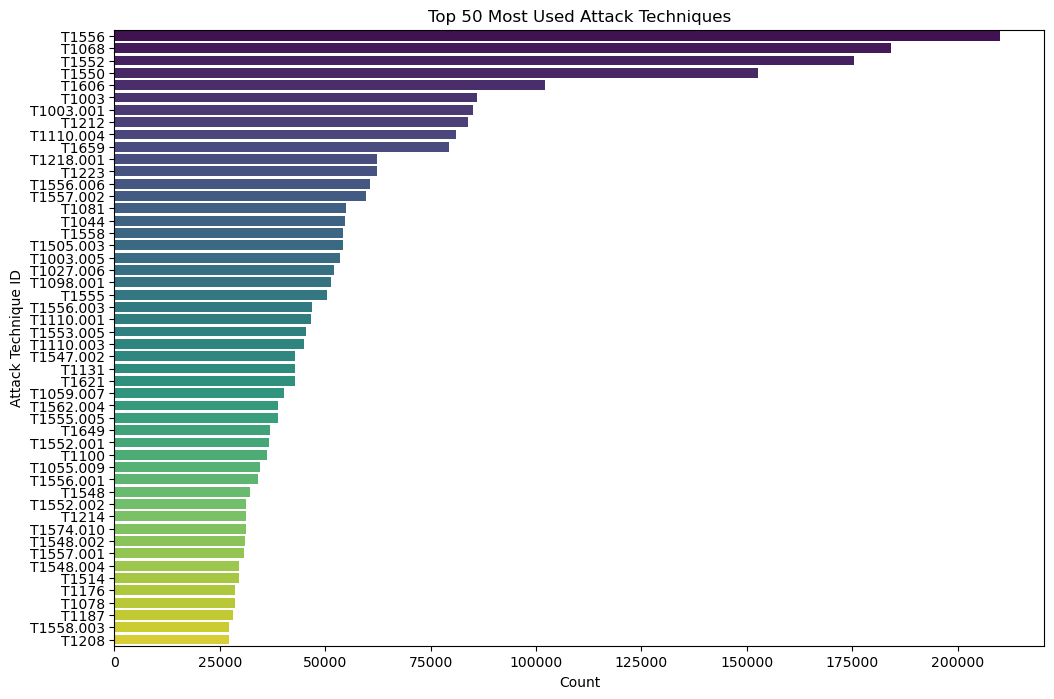

In [6]:
# Plot 1: Most used attack techniques
attack_technique_counts = df['attack_technique_id'].value_counts().head(50)
plt.figure(figsize=(12, 8))
sns.barplot(x=attack_technique_counts.values, y=attack_technique_counts.index, palette='viridis')
plt.title('Top 50 Most Used Attack Techniques')
plt.xlabel('Count')
plt.ylabel('Attack Technique ID')
plt.show()

## CVEs per Year

This section visualizes the number of CVEs per year using a line plot.

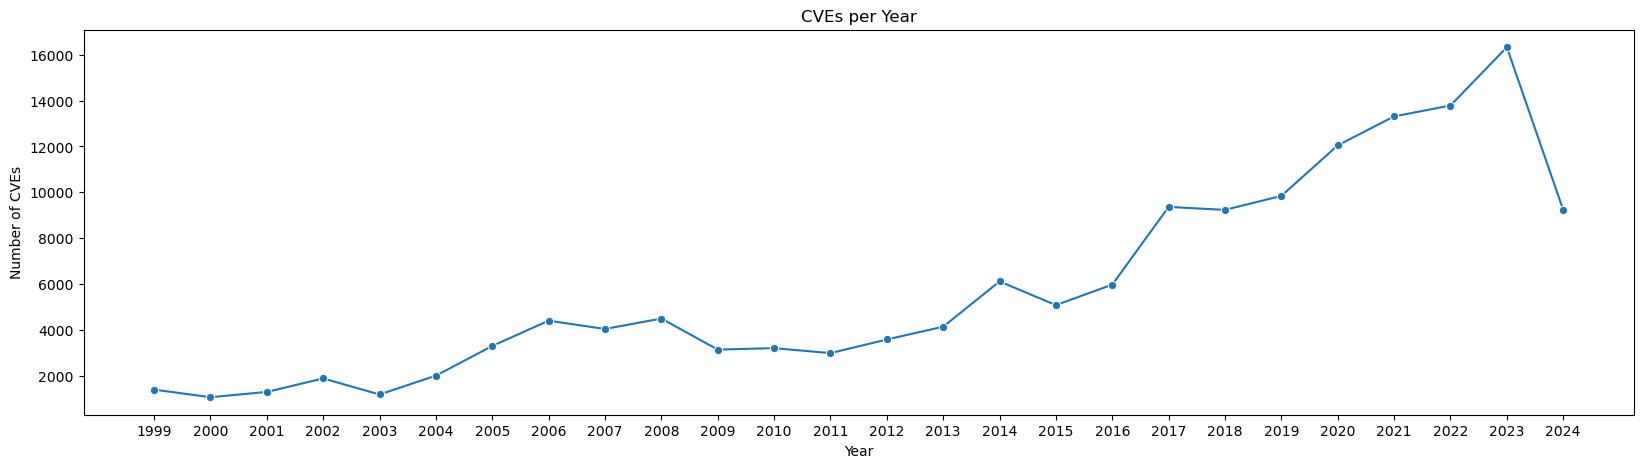

In [7]:
years = list(range(df_cve_agg['year'].min(), df_cve_agg['year'].max() + 1))
cves_per_year = df_cve_agg['year'].value_counts().reindex(years, fill_value=0).sort_index()
plt.figure(figsize=(20, 5))
sns.lineplot(x=cves_per_year.index, y=cves_per_year.values, marker='o')
plt.title('CVEs per Year')
plt.xlabel('Year')
plt.ylabel('Number of CVEs')
plt.xticks(cves_per_year.index)
plt.show()

## CVSS Score Distribution by Publisher

This section generates a box plot to show the distribution of CVSS scores for each publisher.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

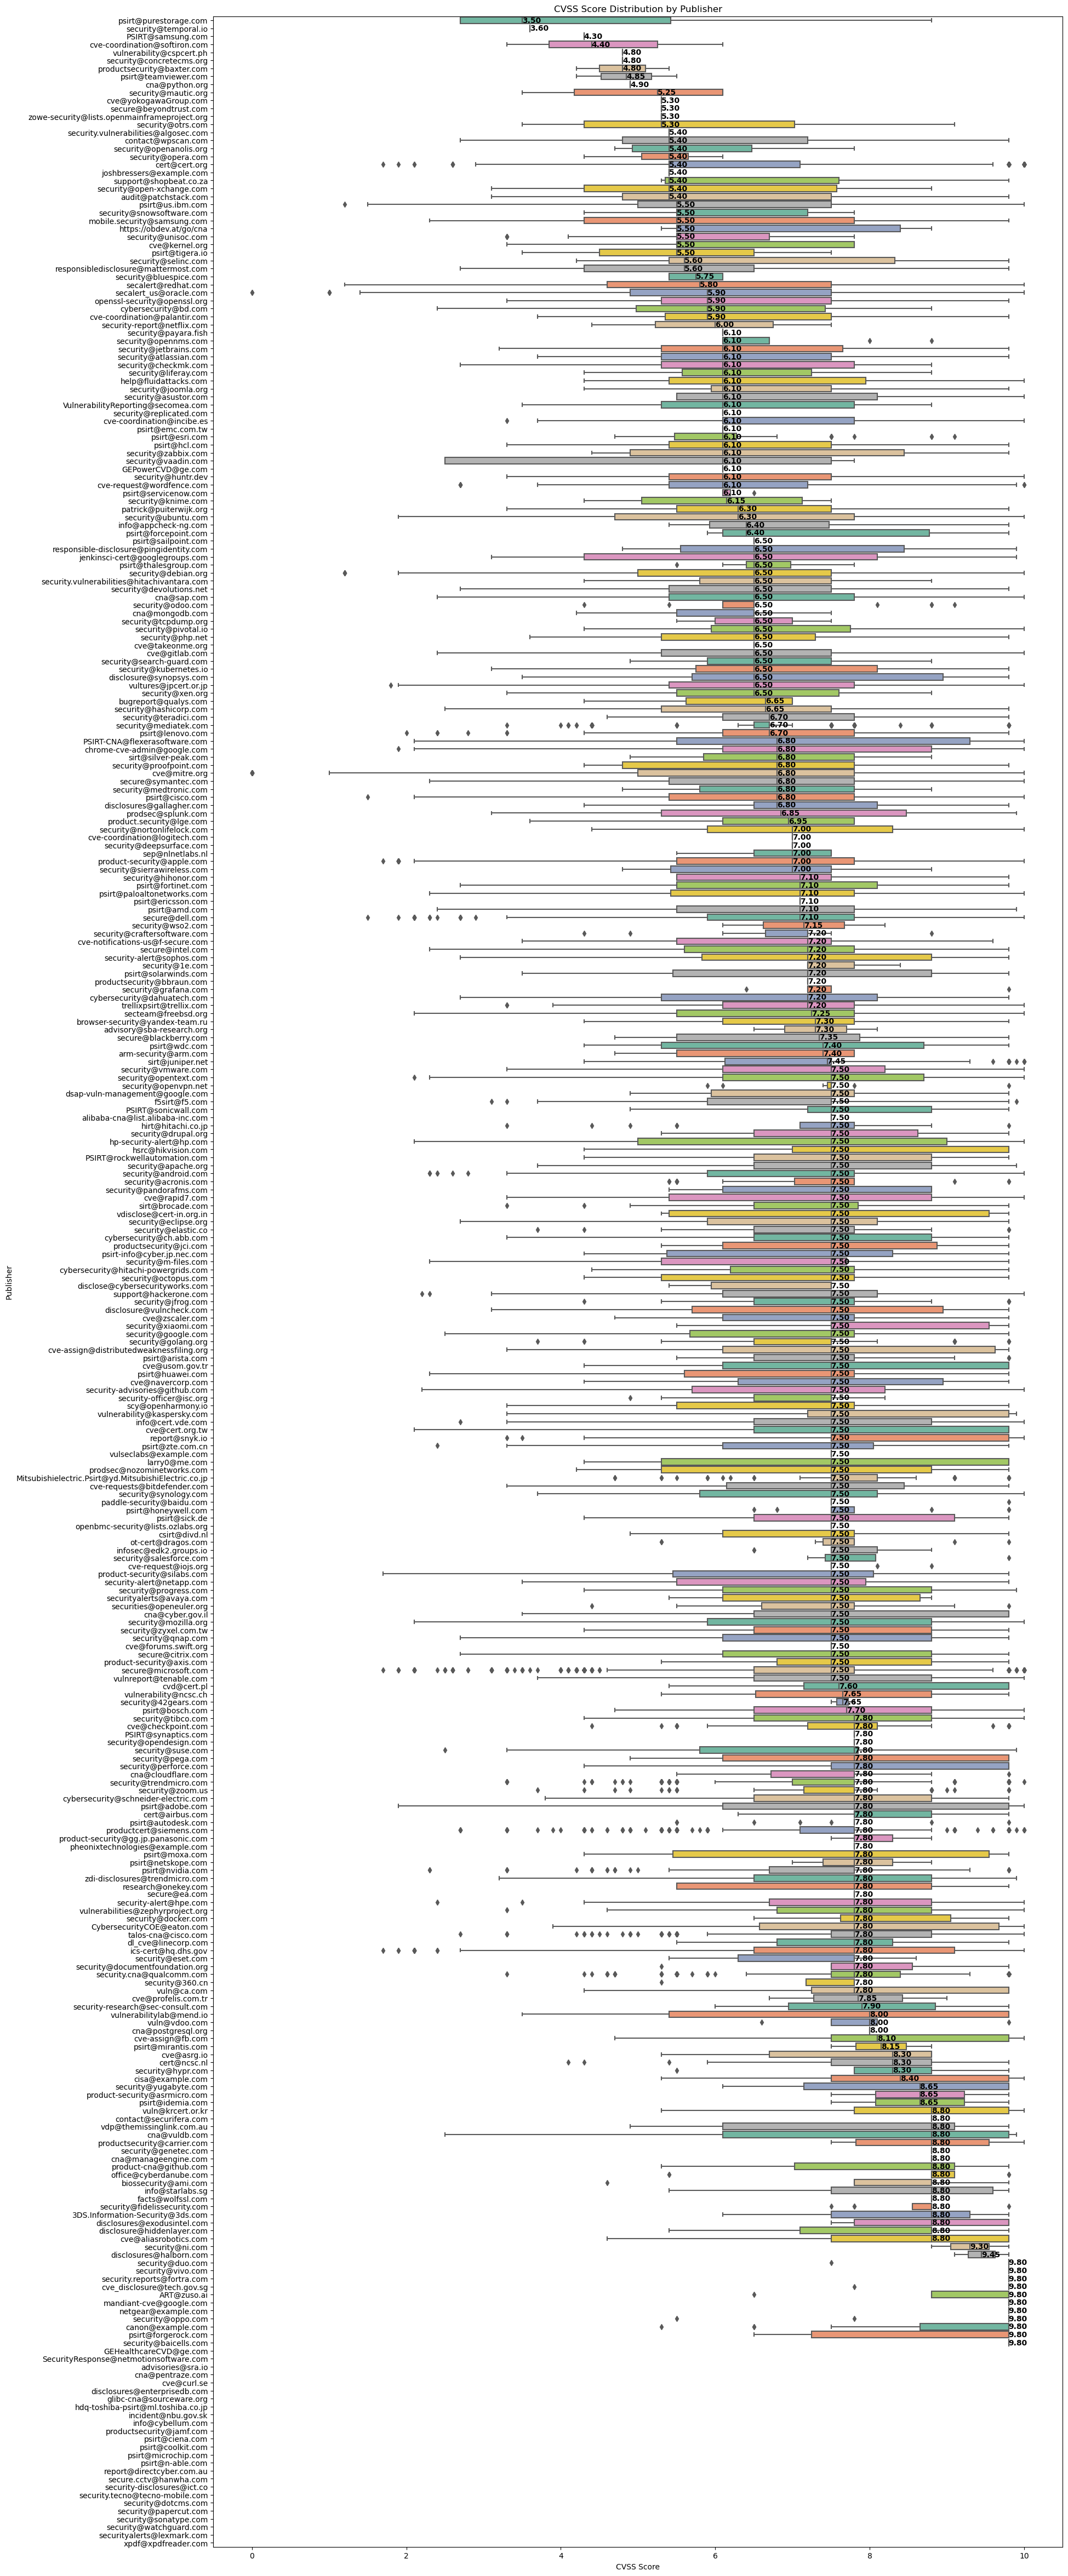

In [8]:
medians = df_cve_agg.groupby('publisher')['cvss_score'].median().sort_values()
plt.figure(figsize=(20, 60))
sns.boxplot(data=df_cve_agg, x='cvss_score', y='publisher', palette='Set2', order=medians.index)
plt.title('CVSS Score Distribution by Publisher')
plt.xlabel('CVSS Score')
plt.ylabel('Publisher')

# Adding median values as labels
for i in range(len(medians)):
    plt.text(medians[i], i, f'{medians[i]:.2f}', va='center', ha='left', color='black', fontweight='bold')

# Save the figure as a PNG file
plt.savefig('cvss_score_distribution_by_publisher.png')

plt.show()

## Distribution of CVSS Score, Impact Score, and Exploitability Score

This section creates a box plot to show the distribution of CVSS scores, impact scores, and exploitability scores.

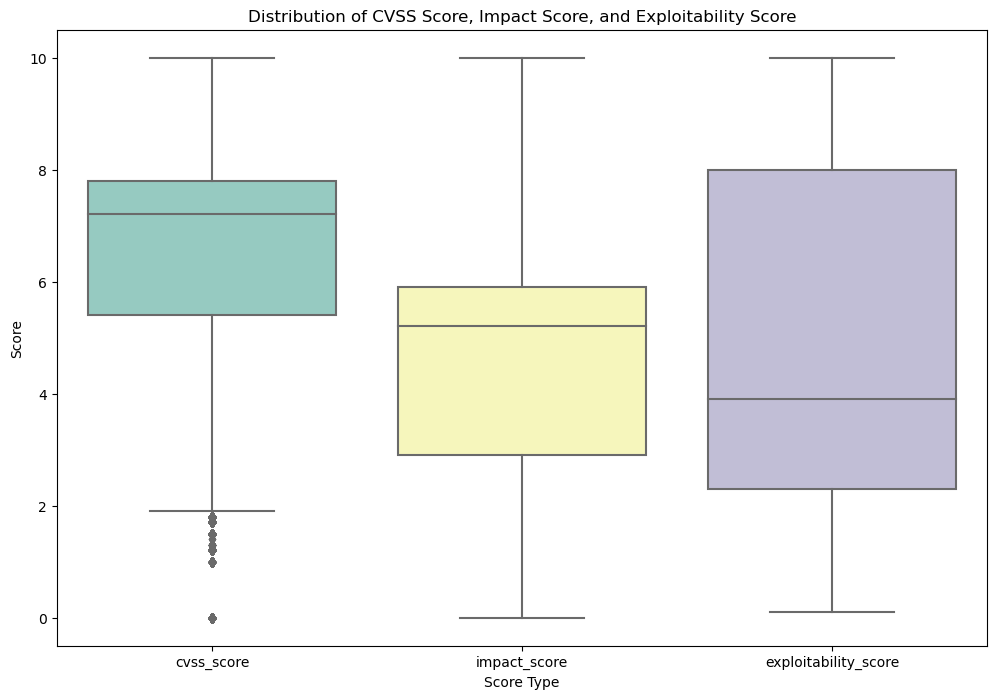

In [9]:
# Plot 4: Box plot showing the CVSS score, impact score, and exploitability score
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['cvss_score', 'impact_score', 'exploitability_score']], palette='Set3')
plt.title('Distribution of CVSS Score, Impact Score, and Exploitability Score')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.show()

## Distribution of Tactics

This section displays a pie chart to show the distribution of different tactics.

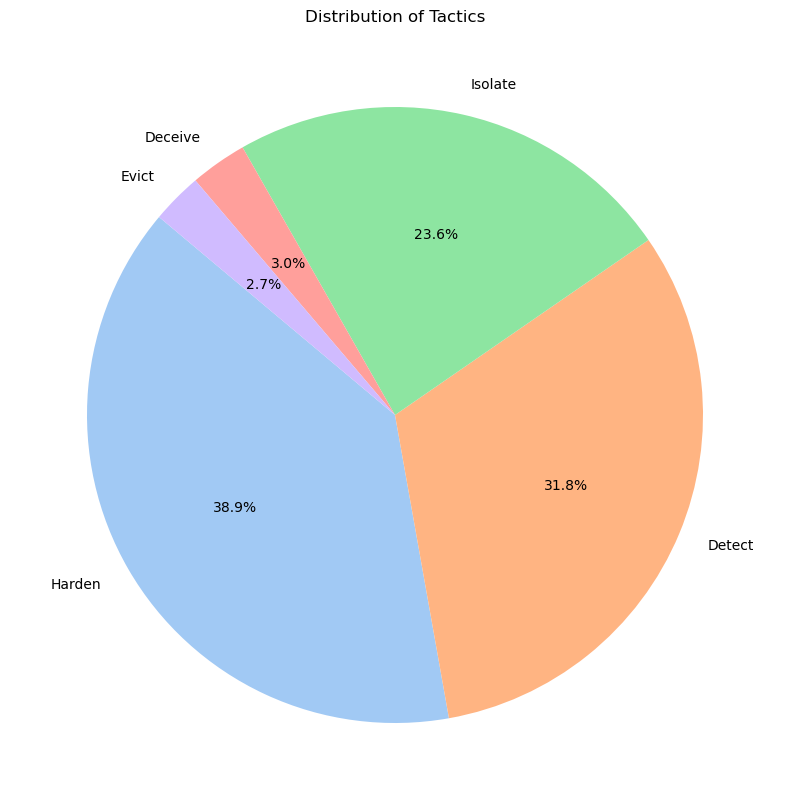

In [10]:
# Plot 5: Pie chart on the tactics
tactic_counts = df['tactic_label'].value_counts()
plt.figure(figsize=(10, 10))
tactic_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Distribution of Tactics')
plt.ylabel('')
plt.show()

## Distribution of Defend IDs

This section displays a pie chart to show the distribution of different defend IDs.

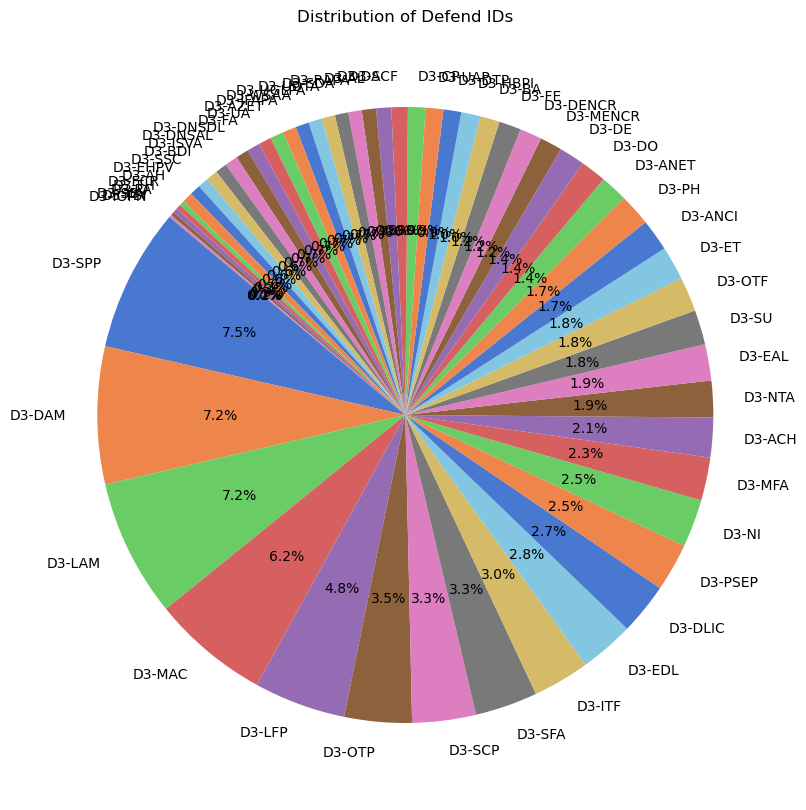

In [11]:
# Plot 6: Pie chart on the defend_ids
defend_id_counts = df['d3fend_id'].value_counts()
plt.figure(figsize=(10, 10))
defend_id_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=140)
plt.title('Distribution of Defend IDs')
plt.ylabel('')
plt.show()